In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ

Obtenemos la vesión instalada de qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
for el, version in qiskit.__qiskit_version__.items():
    print(el, version)

qiskit-terra 0.20.2
qiskit-aer 0.10.4
qiskit-ignis 0.7.1
qiskit-ibmq-provider 0.19.1
qiskit-aqua None
qiskit 0.36.2
qiskit-nature None
qiskit-finance None
qiskit-optimization None
qiskit-machine-learning None


Comenzamos creando un circuito. Vamos a distinguir entre dos tipos de registros:

- Un registro cúantico: Para operar sobre los qubits y alterar sus estados.
- Un registro clásico: Para realizar operaciones clásicas una vez se hayan medido los estados de los qubits.

In [4]:
# Registro de 2 qubits
qr = QuantumRegister(2)
qr

QuantumRegister(2, 'q0')

In [5]:
# Registro clásico 2 bits
cr = ClassicalRegister(2)
cr

ClassicalRegister(2, 'c0')

In [6]:
circuit = QuantumCircuit(qr, cr)
circuit

Comenzamos a dibujar el circuito

In [7]:
%matplotlib inline

In [8]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

Como se observa, tenemos dos qubits (q0 y q1) y dos bits clásicos. Empezaremos aplicando una puerta de Hadamard (H) al qubit q0. De esta forma, lograremos una superposición entre los estados $|0\rangle$ u $|1\rangle$.

In [9]:
circuit.h(qr[0])
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

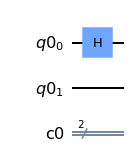

In [10]:
circuit.draw(output = "mpl")

Pasamos ahora a aplicar una puerta Controlled-X dónde usaremos el qubit q0 como qubit de "control". En este caso lo que ocurre es que si el qubit q0 está en estado $|1\rangle$ se calcula una NOT sobre el qubit objetivo o target, es decir, q1.

In [11]:
circuit.cx(qr[0], qr[1])

In [12]:
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

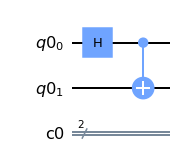

In [13]:
circuit.draw(output = "mpl")

Podemos pasar a medir los dos qubits.

In [14]:
circuit.measure(qr, cr)

In [15]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

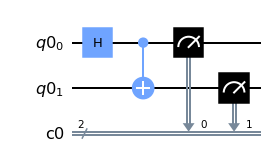

In [16]:
circuit.draw(output = "mpl")

Esto que hemos mostrado es una sóla ejecución. En ejecuciones distintas se podrían obtener resultados diferentes. Vamos a utilizar "qasm_simulator" para hacer una simulación del circuito a nivel local.

In [17]:
backend_simulator = Aer.get_backend("qasm_simulator")
backend_simulator

QasmSimulator('qasm_simulator')

In [18]:
job_simulator = execute(circuit, backend = backend_simulator)
job_simulator

In [19]:
result = job_simulator.result()
result

Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='a108d939-f8fe-494a-b170-0660e15b1a6e', job_id='398ed661-f958-4baf-a913-e188a37f0fc7', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 502, '0x3': 522}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-2', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), status=DONE, seed_simulator=4035501162, metadata={'parallel_state_update': 8, 'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 2, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'num_clbits': 2, 'input_qubit_map': [[1, 1], [0, 0]], 'fusion': {'enabled': False}}, time_taken=0.003090486)], date=2022-06-22T10:54:48.605532, status=COMPLETED, status=QobjHeade

In [20]:
result.status

'COMPLETED'

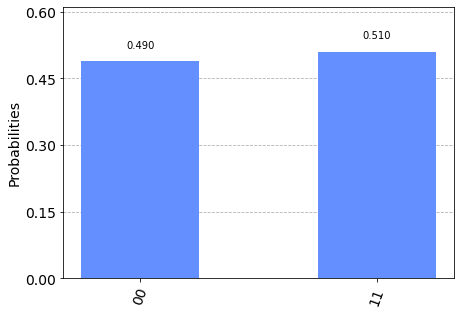

In [21]:
plot_histogram(result.get_counts(circuit))

Aquí ocurre lo siguiente. Al aplicar una puerta Hadamard sobre q0 creamos una superposición equiprobable entre 0 y 1. Por tanto, las ocasiones en las que q0 colapse a $|0\rangle$ la C-X no alterará el estado de q1 que quedará también como $|0\rangle$. Por otra parte, si q0 colapsa como $|1\rangle$ la C-X cambiará q1 también a $|1\rangle$. Esto explica que obtengamos casi la misma probabilidad (cerca del 50%) de leer $|00\rangle$ que $|11\rangle$.

# Ejecución en quantum computer de IBM

In [23]:
IBMQ.save_account()

In [24]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [25]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [27]:
provider = IBMQ.get_provider('ibm-q')
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [28]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo

In [29]:
# Elegimos ibmq_manila
qcomp = provider.get_backend('ibmq_manila')
qcomp

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [30]:
job = execute(circuit, backend = qcomp)
job

In [31]:
from qiskit.tools.monitor import job_monitor

In [32]:
job_monitor(job)

Job Status: job has successfully run


In [33]:
result = job.result()
result

Result(backend_name='ibmq_manila', backend_version='1.0.32', qobj_id='27b53537-d9de-4f98-a085-d8adc4bd7d29', job_id='62b2da924fff654c26ad1f3d', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1791, '0x1': 124, '0x2': 186, '0x3': 1899}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.7853981633974483, memory_slots=2, metadata={}, n_qubits=5, name='circuit-2', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2022-06-22 12:23:27+02:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_manila', backend_version='1.0.32'), execution_id='5751516a-f215-11ec-8bac-bc97e15b08d0', time_taken=6.25291633605957, error=None, client_version={'qiskit': '0.36.2'})

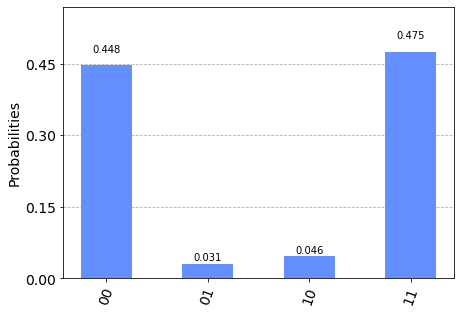

In [34]:
plot_histogram(result.get_counts(circuit))

En este caso vemos que los resultados no concuerdan con los que hemos visto con el "qasm_simulator". Esto es así porque se trata de un simulador perfecto de un computador cuánticos, sin embargo, el ordenador de IBM es un ordenador cuántico real y, por tanto, está sujeto a errores cuánticos.